**QUESTION 1**

In [2]:
# Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
# Split the data into 80% training, 20% testing.
# Plot the training and testing data so it becomes visual.

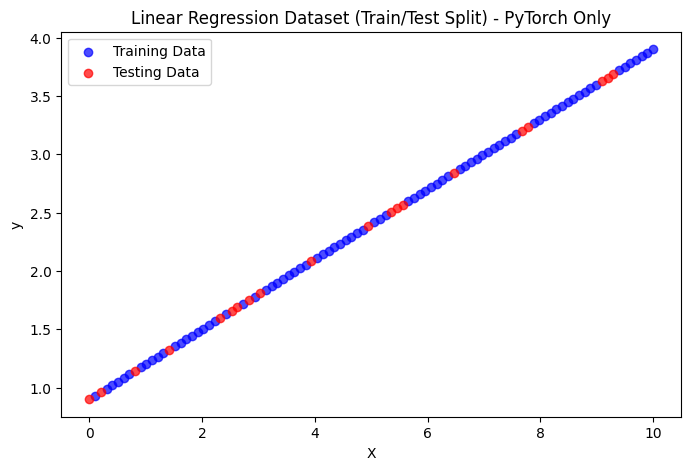

In [16]:
import torch
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
torch.manual_seed(42)

# Setting parameters
weight = 0.3
bias = 0.9
num_points = 100

# Generating X values (randomly sampled)
X = torch.linspace(0, 10, num_points).unsqueeze(1)  # Shape (100, 1)

# Computing y values using the linear equation
y = weight * X + bias

# Shuffling indices
indices = torch.randperm(num_points)

# Splitting into training (80%) and testing (20%)
train_size = int(0.8 * num_points)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Plotting training and testing data
plt.figure(figsize=(8, 5))
plt.scatter(X_train.numpy(), y_train.numpy(), label="Training Data", color="blue", alpha=0.7)
plt.scatter(X_test.numpy(), y_test.numpy(), label="Testing Data", color="red", alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Dataset (Train/Test Split) - PyTorch Only")
plt.legend()
plt.show()


**QUESTION 2**

In [17]:
# Build a PyTorch model by subclassing nn.Module.
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
# Once you've constructed the model, make an instance of it and check its state_dict().
# Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [18]:
import torch.nn as nn
# Defining the Linear Regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define weight and bias as trainable parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))  # Random weight
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))  # Random bias

    def forward(self, X):
        return self.weight * X + self.bias  # Linear regression formula

# Instantiating the model
model = LinearRegressionModel()

# Printing model parameters
print("Model's State Dict:")
print(model.state_dict())

Model's State Dict:
OrderedDict([('weight', tensor([2.5952])), ('bias', tensor([2.7504]))])


**QUESTION 3**

In [19]:
# Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
# Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
# Write a training loop to perform the appropriate training steps for 300 epochs.
# The training loop should test the model on the test dataset every 20 epochs.

Epoch 20/300 | Train Loss: 8.4304 | Test Loss: 7.4039
Epoch 40/300 | Train Loss: 2.9902 | Test Loss: 2.5712
Epoch 60/300 | Train Loss: 0.5348 | Test Loss: 0.6183
Epoch 80/300 | Train Loss: 0.5027 | Test Loss: 0.5807
Epoch 100/300 | Train Loss: 0.4707 | Test Loss: 0.5436
Epoch 120/300 | Train Loss: 0.4386 | Test Loss: 0.5065
Epoch 140/300 | Train Loss: 0.4066 | Test Loss: 0.4694
Epoch 160/300 | Train Loss: 0.3745 | Test Loss: 0.4323
Epoch 180/300 | Train Loss: 0.3425 | Test Loss: 0.3952
Epoch 200/300 | Train Loss: 0.3104 | Test Loss: 0.3581
Epoch 220/300 | Train Loss: 0.2784 | Test Loss: 0.3210
Epoch 240/300 | Train Loss: 0.2464 | Test Loss: 0.2839
Epoch 260/300 | Train Loss: 0.2144 | Test Loss: 0.2463
Epoch 280/300 | Train Loss: 0.1824 | Test Loss: 0.2091
Epoch 300/300 | Train Loss: 0.1526 | Test Loss: 0.1760


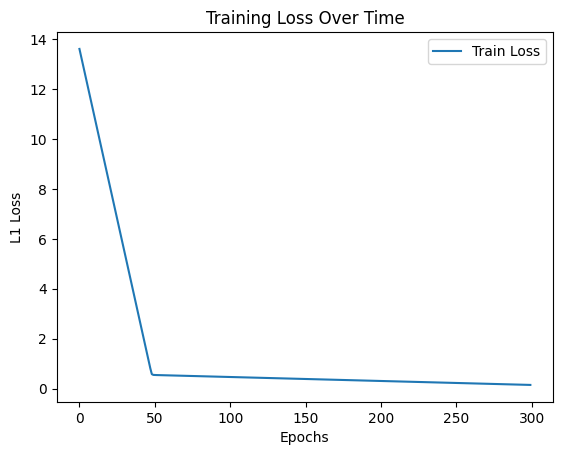

In [20]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Settinh seed for reproducibility
torch.manual_seed(42)

# Generating data (same as before)
weight_true = 0.3
bias_true = 0.9
num_points = 100

X = torch.linspace(0, 10, num_points).unsqueeze(1)  # Shape (100, 1)
y = weight_true * X + bias_true

# Shuffling and splitting data
indices = torch.randperm(num_points)
train_size = int(0.8 * num_points)
train_indices, test_indices = indices[:train_size], indices[train_size:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# Defining the Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, X):
        return self.weight * X + self.bias  # y = wX + b

# Instantiating model
model = LinearRegressionModel()

# Defining loss function (L1 Loss)
loss_fn = nn.L1Loss()

# Defining optimizer (SGD with learning rate 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 300
test_every = 20
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    # Backpropagation
    optimizer.zero_grad()  # Zero gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update parameters

    # Storing training loss
    train_losses.append(loss.item())

    # Testing the model every 20 epochs
    if (epoch + 1) % test_every == 0:
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient tracking
            y_test_pred = model(X_test)
            test_loss = loss_fn(y_test_pred, y_test)
            test_losses.append(test_loss.item())

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")
        model.train()  # Set model back to training mode

# Plotting training loss over epochs
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("L1 Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

**QUESTION 4**

In [21]:
# Make predictions with the trained model on the test data.
# Visualize these predictions against the original training and testing data
#(note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

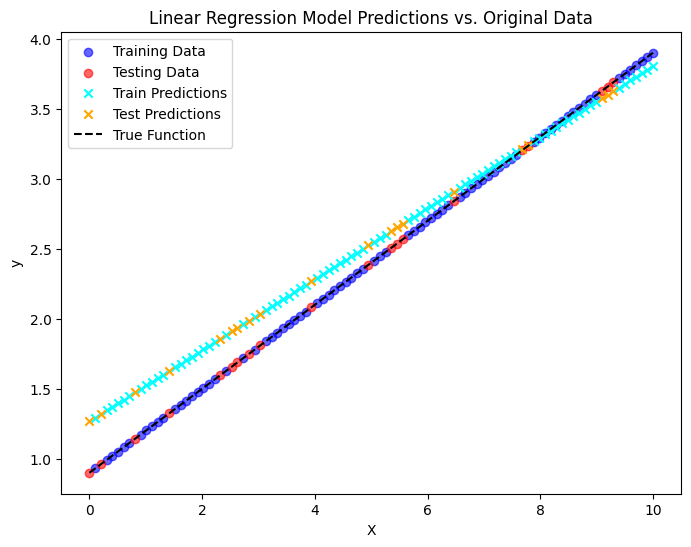

In [22]:
# Ensuring model is in evaluation mode
model.eval()

# Making predictions (detach from computation graph)
with torch.no_grad():
    y_train_pred = model(X_train)  # Predictions for training data
    y_test_pred = model(X_test)    # Predictions for test data

# Converting tensors to CPU for plotting (if on GPU)
X_train_np, y_train_np = X_train.cpu().numpy(), y_train.cpu().numpy()
X_test_np, y_test_np = X_test.cpu().numpy(), y_test.cpu().numpy()
y_train_pred_np = y_train_pred.cpu().numpy()
y_test_pred_np = y_test_pred.cpu().numpy()

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_np, y_train_np, label="Training Data", color="blue", alpha=0.6)
plt.scatter(X_test_np, y_test_np, label="Testing Data", color="red", alpha=0.6)
plt.scatter(X_train_np, y_train_pred_np, label="Train Predictions", color="cyan", marker="x")
plt.scatter(X_test_np, y_test_pred_np, label="Test Predictions", color="orange", marker="x")
plt.plot(X.cpu().numpy(), (weight_true * X + bias_true).cpu().numpy(), label="True Function", color="black", linestyle="dashed")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Model Predictions vs. Original Data")
plt.show()

**QUESTION 5**

In [13]:
#Save your trained model's state_dict() to file.
# Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
# Perform predictions on your test data with the loaded model and confirm they match the original model predictions form 4

In [23]:
# Defining file path for saving model
MODEL_PATH = "model.pth"

# Saving the trained model's state_dict()
torch.save(model.state_dict(), MODEL_PATH)

# Creating a new instance of the model
loaded_model = LinearRegressionModel()

# Loading the saved state_dict() into the new model
loaded_model.load_state_dict(torch.load(MODEL_PATH))

# Ensuring the loaded model is in evaluation mode
loaded_model.eval()

# Making predictions with the loaded model
with torch.no_grad():
    y_test_pred_loaded = loaded_model(X_test)

# Comparing predictions from the original model and loaded model
print("Predictions match:", torch.allclose(y_test_pred, y_test_pred_loaded, atol=1e-6))

Predictions match: True


<ipython-input-23-696abaaf489d>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_PATH))
